# Basics of NetworkX

In [1]:
!pip install networkx
import networkx as nx

    100% |████████████████████████████████| 1.6MB 745kB/s ta 0:00:01
  Running setup.py bdist_wheel for networkx ... error
  Complete output from command /srv/venv/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-mdnezfvl/networkx/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmpqi3o8ldtpip-wheel- --python-tag cp36:
  usage: -c [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
     or: -c --help [cmd1 cmd2 ...]
     or: -c --help-commands
     or: -c cmd --help
  
  error: invalid command 'bdist_wheel'
  
  ----------------------------------------
  Failed building wheel for networkx
  Running setup.py clean for networkx
Failed to build networkx
  Running setup.py install for networkx ... done


In [2]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from({2,3,"u","v"})

In [3]:
G.nodes()

NodeView((1, 'v', 2, 3, 'u'))

In [4]:
G.add_edge(1,2)
G.add_edge("u","v")
G.add_edges_from([(1,2),(1,4),(1,5),(1,6)])

In [5]:
G.edges()

EdgeView([(1, 2), (1, 4), (1, 5), (1, 6), ('v', 'u')])

In [6]:
G.nodes()

NodeView((1, 'v', 2, 3, 'u', 4, 5, 6))

In [7]:
G.remove_edges_from([(1,2),("u","v")])

In [8]:
G.number_of_edges()

3

# Graph Visualization


In [9]:
!pip install matplotlib
import matplotlib.pyplot as plt

    100% |████████████████████████████████| 12.6MB 100kB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 9.9MB/s eta 0:00:01
    100% |████████████████████████████████| 12.2MB 112kB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 2.8MB/s eta 0:00:01
    100% |████████████████████████████████| 952kB 1.5MB/s eta 0:00:01


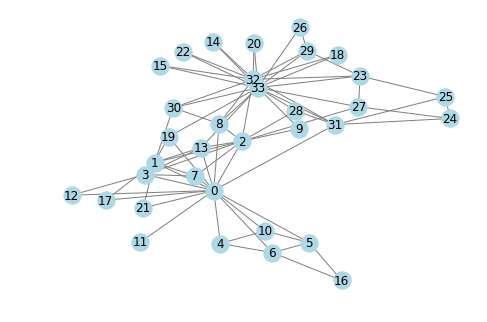

In [10]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")

In [11]:
G.degree()[33]

17

In [12]:
G.number_of_edges()

78

In [13]:
G.number_of_nodes()

34

In [14]:
G.degree(0) is G.degree()[0]

True

# Random Graphs

In [15]:
!pip install scipy
from scipy.stats import bernoulli

    100% |████████████████████████████████| 50.0MB 25kB/s  eta 0:00:01    68% |██████████████████████          | 34.2MB 19.3MB/s eta 0:00:01    95% |██████████████████████████████▋ | 47.8MB 30.8MB/s eta 0:00:01


In [16]:
bernoulli.rvs(p=0.2)

0

In [17]:
N = 20
p = 0.2
# create empty graph
# add all N nodes in the graph
# loop over all pairs of nodes
    # add an edge with prob p
def er_graph(N,p):
    """Generate ans ER graph"""
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G

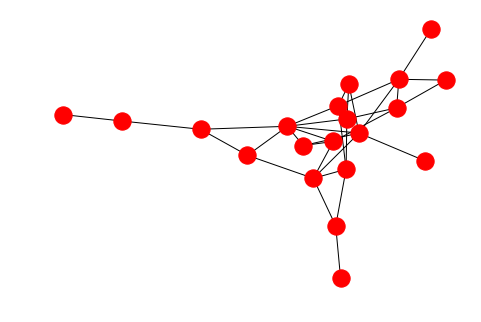

In [18]:
nx.draw(er_graph(N,p))

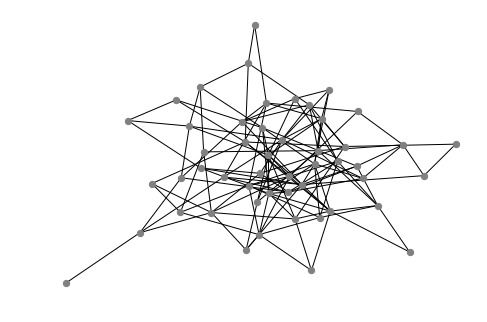

In [19]:
N, p = 50, 0.1
nx.draw(er_graph(N,p), node_size=40, node_color="gray")
plt.savefig("er1.pdf")

# Plotting the Degree Distribution

In [20]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")

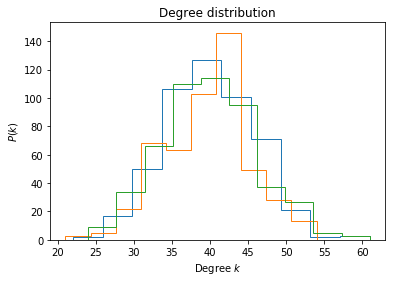

In [21]:
G1 = er_graph(500, 0.08)
plot_degree_distribution(G1)
G2 = er_graph(500, 0.08)
plot_degree_distribution(G2)
G3 = er_graph(500, 0.08)
plot_degree_distribution(G3)
plt.savefig("hist1.pdf")

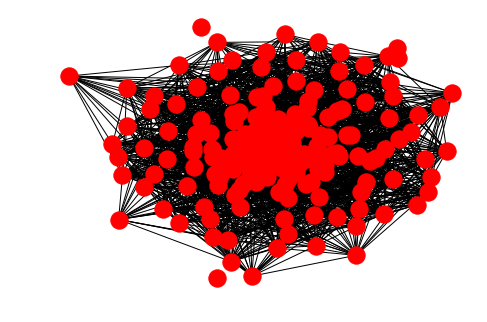

In [22]:
G1 = nx.erdos_renyi_graph(100, 0.03)
G2 = nx.erdos_renyi_graph(100, 0.30)
nx.draw(G1)
nx.draw(G2)

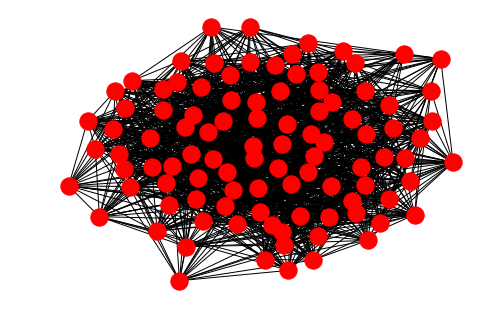

In [23]:
nx.draw(G2)

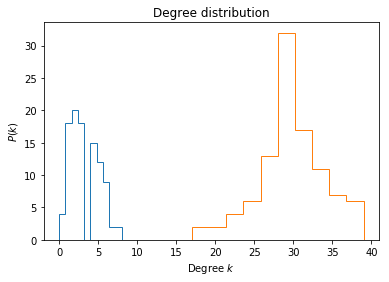

In [24]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)

# Descriptive Statistics of Empirical Social Networks

In [25]:
!pip install numpy
import numpy as np

In [26]:
A1 = np.loadtxt("Social Networks/adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("Social Networks/adj_allVillageRelationships_vilno_2.csv", delimiter=",")
A1

OSError: Social Networks/adj_allVillageRelationships_vilno_1.csv not found.

In [27]:
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

NameError: name 'A1' is not defined

In [30]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))    

In [29]:
basic_net_stats(G1)

Number of nodes: 100
Number of edges: 158
Average degree: 3.16


In [31]:
basic_net_stats(G2)

Number of nodes: 100
Number of edges: 1484
Average degree: 29.68


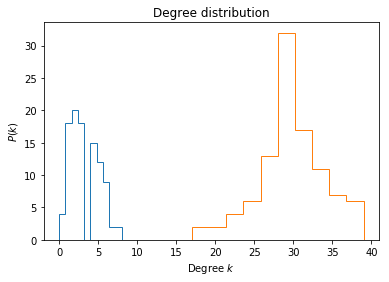

In [32]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)

# Finding the Largest Connected Component

In [33]:
gen = nx.connected_component_subgraphs(G1)

In [34]:
g = gen.__next__()
type(g)

networkx.classes.graph.Graph

In [35]:
g.number_of_nodes()

96

In [36]:
len(gen.__next__())

1

In [37]:
len(G1)

100

In [38]:
G1.number_of_nodes()

100

We call gen.__next__() to know the number of nodes in each components

In [40]:
G1_LCC = max(nx.connected_component_subgraphs(G1), key=len)

In [41]:
G2_LCC = max(nx.connected_component_subgraphs(G2), key=len)

In [42]:
len(G1_LCC)

96

In [43]:
G1_LCC.number_of_nodes()

96

In [44]:
len(G2_LCC)

100

In [45]:
G2_LCC.number_of_nodes()

100

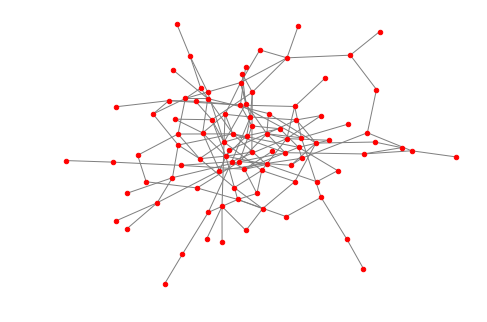

In [46]:
plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color="gray", node_size=20)

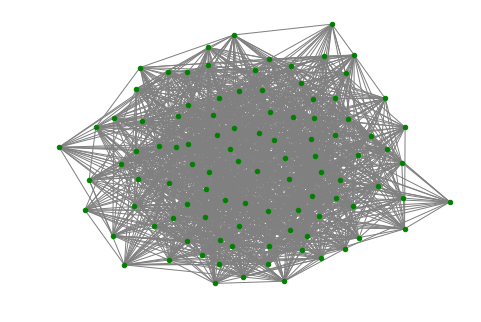

In [48]:
plt.figure()
nx.draw(G2_LCC, node_color="green", edge_color="gray", node_size=20)

In G2 : 2 groups communities